# Welly module in Python

Python has a number of open-source user-developed modules that are used for different development purposes. Welly is one of them. An open-source module that can work with Well Log Data and can load, process and visualise it efficiently.

There are small number of petrophysics modules that are developed in python.

Well Log data is very important;

Well Log measurements are electrical measurements that have been takken along the length of the wellbore, that can include measurements of natural radioactivity of the formation, as well as interactions between electrical currents and fluids contained within the formations and from this data, we can infer a number of properties about the subsurface including porosity and permeability of the rock and from that we can understand the hydrocarbon potential of the formation as well as the potential storage capacity for something such as Carbon Dioxide.

Welly Module is developed by agile geoscience group to help with the loading ad analyzing and visualization of the Well Log data. Additionally it provides tools to analyze the data quality before carrying out any further interpretation.

## importing Module

In [2]:
from welly import Well
from welly import Curve
import matplotlib.pyplot as plt

In [3]:
well = Well.from_las("../Data/inputs/welly_data.las")

## Data Exploration

In [4]:
well

Well(uwi: '', name: 'L05-B-01', 5 curves: ['GR', 'DT', 'RHOB', 'DRHO', 'NPHI'])

In [5]:
well.header

,original_mnemonic,mnemonic,unit,value,descr,section
0,VERS,VERS,,2.0,CWLS LOG ASCII STANDARD - VERSION 2.0,Version
1,WRAP,WRAP,,NO,ONE LINE PER DEPTH STEP,Version
2,STRT,STRT,M,81.0,First Index Value,Well
3,STOP,STOP,M,4879.7006,Last Index Value,Well
4,STEP,STEP,M,0.1,Frame Spacing,Well
5,NULL,NULL,,-999.25,Absent Value,Well
6,WELL,WELL,,L05-B-01,Well Name,Well
7,FLD,FLD,,L5,Field Name,Well
8,CNTY,CNTY,,GLOMAR ADRIATIC XI,County,Well
9,STAT,STAT,,NETHERLANDS,State,Well


In [6]:
well.location

Location({'position': None, 'crs': CRS({}), 'location': 'NORTH SEA', 'country': 'NETHERLANDS', 'state': 'NETHERLANDS', 'county': 'GLOMAR ADRIATIC XI', 'latitude': '53 42\' 18.113"', 'longitude': '04 36\' 12.526"', 'api': '', 'ekb': 40.0, 'tdd': 4906.0, 'td': None, 'deviation': None})

In [7]:
lati = well.location.latitude
long = well.location.longitude

print(lati)
print(long)

53 42' 18.113"
04 36' 12.526"


# Exploring Data

In [8]:
well.count_curves()

5

In [9]:
well._get_curve_mnemonics()

['GR', 'DT', 'RHOB', 'DRHO', 'NPHI']

In [10]:
well.data

{'GR': Curve(mnemonic=GR, units=GAPI, start=81.0000, stop=4879.7006, step=0.0000, count=[47974]),
 'DT': Curve(mnemonic=DT, units=US/F, start=81.0000, stop=4879.7006, step=0.0000, count=[21709]),
 'RHOB': Curve(mnemonic=RHOB, units=G/C3, start=81.0000, stop=4879.7006, step=0.0000, count=[2075]),
 'DRHO': Curve(mnemonic=DRHO, units=G/C3, start=81.0000, stop=4879.7006, step=0.0000, count=[2075]),
 'NPHI': Curve(mnemonic=NPHI, units=V/V, start=81.0000, stop=4879.7006, step=0.0000, count=[3095])}

In [11]:
well.data['GR']

Curve(mnemonic=GR, units=GAPI, start=81.0000, stop=4879.7006, step=0.0000, count=[47974])

## Data Quality Check

In [12]:
import welly.quality as wq

In [13]:
tests = {'Each': [wq.no_flat,
         wq.no_gaps,
         wq.not_empty],
         'GR': [
             wq.all_positive,
             wq.all_between(0,250),
             wq.check_units(['API', 'GAPI'])
         ],
         'RHOB': [
             wq.all_positive,
             wq.all_between(1.5,3),
             wq.check_units(['G/CC', 'g/cn3'])
         ]}

In [14]:
from IPython.display import HTML
data_qc_table = well.qc_table_html(tests)
HTML(data_qc_table)

Curve,Passed,Score,not_empty,all_between,no_flat,all_positive,no_gaps,check_units
GR,6 / 6,1.000,True,True,True,True,True,True
DT,2 / 3,0.667,True,,True,,False,
RHOB,5 / 6,0.833,True,True,True,True,True,False
DRHO,3 / 3,1.000,True,,True,,True,
NPHI,3 / 3,1.000,True,,True,,True,


In [15]:
well.data['RHOB']

Curve(mnemonic=RHOB, units=G/C3, start=81.0000, stop=4879.7006, step=0.0000, count=[2075])

In [16]:
tests_nans = {'Each': [wq.fraction_not_nans]}
data_nans_qc_table = well.qc_table_html(tests_nans)
HTML(data_nans_qc_table)

Curve,Passed,Score,fraction_not_nans
GR,0.999708260398433 / 1,1.000,0.999708260398433
DT,0.4523839293156623 / 1,0.452,0.4523839293156623
RHOB,0.0432399766608319 / 1,0.043,0.0432399766608319
DRHO,0.0432399766608319 / 1,0.043,0.0432399766608319
NPHI,0.06449529048928904 / 1,0.064,0.06449529048928904


In [18]:
print((f'Curve \t % Complete').expandtabs(10))
print((f'----- \t -----------').expandtabs(10))

for k,v in well.qc_data(tests_nans).items():
    for i,j in v.items():
        values=round(j*100,2)
    print((f'{k} \t {values}%' ).expandtabs(10))

Curve      % Complete
-----      -----------
GR         99.97%
DT         45.24%
RHOB       4.32%
DRHO       4.32%
NPHI       6.45%


## Basic Plotting with Welly


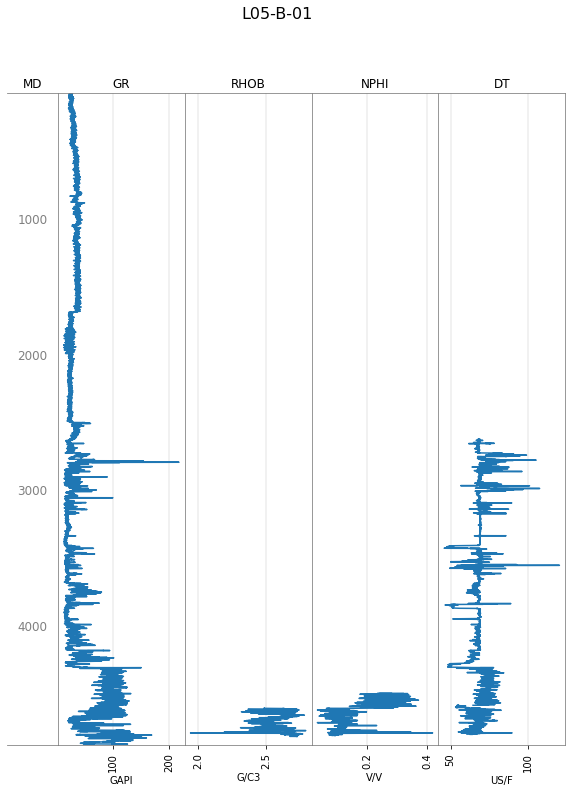

In [20]:
tracks = ['MD','GR', 'RHOB','NPHI', 'DT']
well.plot(tracks=tracks)

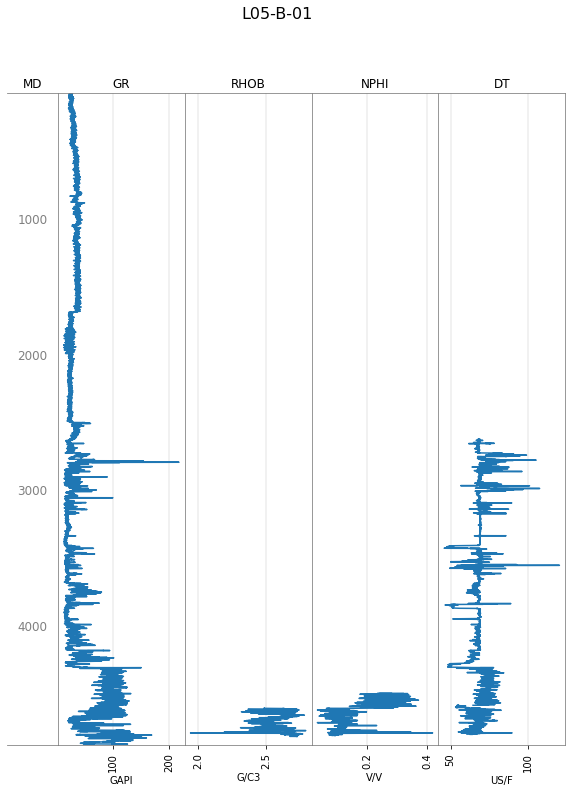

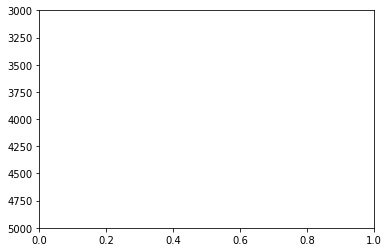

In [22]:
tracks = ['MD','GR', 'RHOB','NPHI', 'DT']

plt.ylim(5000,3000)
well.plot(tracks=tracks)

# Welly to Pandas Dataframe


In [23]:
df=well.df()

In [24]:
df

,GR,DT,RHOB,DRHO,NPHI
DEPT,,,,,
81.0,NaN,NaN,NaN,NaN,NaN
82.0,NaN,NaN,NaN,NaN,NaN
83.0,23.235703000,NaN,NaN,NaN,NaN
84.0,22.028881000,NaN,NaN,NaN,NaN
85.0,24.331657000,NaN,NaN,NaN,NaN
...,...,...,...,...,...
4875.0,101.878146388,NaN,NaN,NaN,NaN
4876.0,104.593236966,NaN,NaN,NaN,NaN
4877.0,103.090592646,NaN,NaN,NaN,NaN


In [25]:
df.describe()

,GR,DT,RHOB,DRHO,NPHI
count,4797.0000000000,2170.0000000000,207.0000000000,207.0000000000,309.0000000000
mean,36.0487982300,68.3767319116,2.5594916779,0.0176576564,0.1636017228
std,23.2208116824,5.6885362774,0.1239327943,0.0458511985,0.0791964007
min,12.0199110000,46.8437516720,1.9546740000,-0.1300330000,0.0335770320
25%,22.7054630000,67.3827693840,2.4973186500,-0.0155278720,0.1012420000
50%,29.8225670000,68.6552209255,2.5655387100,0.0026197380,0.1309782360
75%,37.4326958240,69.3066997593,2.6622683160,0.0473911640,0.2308796940
max,217.6526823380,120.1704100000,2.7581690000,0.1279050000,0.3853830000


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 4799 entries, 81.0 to 4879.0
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   GR      4797 non-null   float64
 1   DT      2170 non-null   float64
 2   RHOB    207 non-null    float64
 3   DRHO    207 non-null    float64
 4   NPHI    309 non-null    float64
dtypes: float64(5)
memory usage: 225.0 KB


# Summary
Here we have seen, how welly module in python can be used to load, process and visualize the well log data.

Author:\
Dilshad Raza\
07/23/2022